# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [304]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint
from datetime import datetime

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [288]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

test_cities = cities[0:100]
#test_cities = cities.copy()
#print(test_cities)

614


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [289]:
# Setup the Endpoint url and units
url = "http://api.openweathermap.org/data/2.5/weather"
units = 'imperial'

# Create a dataframe to store results of the calls
column_names = {
    "City",        
    "Lat",
    "Lng",
    "Max Temp",
    "Humidity", 
    "Cloudiness",       
    "Wind Speed", 
    "Country", 
    "Date",
}
cities_df = pd.DataFrame(columns=column_names)

# Loop through each city and call the weather api
i = 1
for city in test_cities:
        
    params = {
        "appid": weather_api_key,
        "q": city,
        "units": units,
    }
    
    weather_response = requests.get(url, params).json()
    
    #pprint(weather_response)
    
    # Check to make sure we got data for each of the cities
    try:
        new_row = {
            "City": city,
            "Lat": weather_response["coord"]["lat"],
            "Lng": weather_response["coord"]["lon"],
            "Max Temp": weather_response["main"]["temp_max"],
            "Humidity": weather_response["main"]["humidity"], 
            "Cloudiness": weather_response["clouds"]["all"],       
            "Wind Speed": weather_response["wind"]["speed"], 
            "Country":weather_response["sys"]["country"], 
            "Date": weather_response["dt"],
        }
        
        # Print and append the row to the dataframe
        print(f"Processing Record {i} of {len(test_cities)} | {city}")

        cities_df = cities_df.append(new_row, ignore_index=True)

        
    except (KeyError, IndexError):
        # Skip if anything is missing
        print(f"Skipping {city} as field or result was not present ({i})")
        
    i += 1
        

Processing Record 1 of 100 | shenjiamen
Processing Record 2 of 100 | barrow
Processing Record 3 of 100 | saint-philippe
Processing Record 4 of 100 | vila franca do campo
Processing Record 5 of 100 | bluff
Processing Record 6 of 100 | mataura
Skipping barentsburg as field or result was not present (7)
Processing Record 8 of 100 | port alfred
Skipping nizhneyansk as field or result was not present (9)
Processing Record 10 of 100 | albany
Processing Record 11 of 100 | new norfolk
Processing Record 12 of 100 | tuktoyaktuk
Processing Record 13 of 100 | rikitea
Processing Record 14 of 100 | punta arenas
Processing Record 15 of 100 | carlsbad
Processing Record 16 of 100 | goundam
Processing Record 17 of 100 | ozinki
Skipping taolanaro as field or result was not present (18)
Processing Record 19 of 100 | buala
Processing Record 20 of 100 | dikson
Processing Record 21 of 100 | jati
Processing Record 22 of 100 | saldanha
Processing Record 23 of 100 | alice springs
Processing Record 24 of 100 | b

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [290]:
# Redorder the columns
cities_df = cities_df[[
    "City",        
    "Lat",
    "Lng",
    "Max Temp",
    "Humidity", 
    "Cloudiness",       
    "Wind Speed", 
    "Country", 
    "Date"
]]

In [291]:
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shenjiamen,29.96,122.30,66.40,77,85,11.18,CN,1603838783
1,barrow,71.29,-156.79,30.20,63,75,21.92,US,1603838743
2,saint-philippe,-21.36,55.77,71.60,64,0,4.70,RE,1603838784
3,vila franca do campo,37.72,-25.43,64.40,63,75,6.93,PT,1603838784
4,bluff,-46.60,168.33,55.99,73,17,1.99,NZ,1603838784
...,...,...,...,...,...,...,...,...,...
85,marawi,8.00,124.29,75.00,90,99,8.99,PH,1603838806
86,norrtalje,59.76,18.70,54.00,85,78,5.99,SE,1603838806
87,east london,-33.02,27.91,69.80,83,33,17.54,ZA,1603838807
88,esperance,-33.87,121.90,55.40,100,79,5.82,AU,1603838807


In [292]:
cities_df.to_csv(output_data_file)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [293]:
# Check the data types to ensure we have numbers
cities_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity       object
Cloudiness     object
Wind Speed    float64
Country        object
Date           object
dtype: object

In [294]:
cities_df["Max Temp"] = cities_df["Max Temp"].astype('float')
cities_df["Humidity"] = cities_df["Humidity"].astype('float')
cities_df["Cloudiness"] = cities_df["Cloudiness"].astype('float')
cities_df["Date"] = cities_df["Date"].astype('int')

In [295]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,9.000000e+01
mean,15.078778,7.188667,56.156778,70.200000,44.488889,8.338111,1.603839e+09
std,39.503208,102.526343,21.200772,20.867802,38.302828,5.672073,7.970150e+01
min,-54.800000,-175.200000,-2.240000,6.000000,0.000000,0.870000,1.603839e+09
25%,-23.007500,-72.060000,42.482500,61.250000,2.250000,3.522500,1.603839e+09
50%,19.655000,18.560000,60.450000,74.500000,40.000000,6.930000,1.603839e+09
75%,50.097500,94.677500,73.122500,83.750000,78.750000,11.410000,1.603839e+09
max,78.220000,169.850000,87.800000,100.000000,100.000000,26.440000,1.603839e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [197]:
# test lines, remove later
#cities_df.loc[0, "Humidity"] = 105
#cities_df.loc[3, "Humidity"] = 121

In [296]:
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shenjiamen,29.96,122.30,66.40,77.0,85.0,11.18,CN,1603838783
1,barrow,71.29,-156.79,30.20,63.0,75.0,21.92,US,1603838743
2,saint-philippe,-21.36,55.77,71.60,64.0,0.0,4.70,RE,1603838784
3,vila franca do campo,37.72,-25.43,64.40,63.0,75.0,6.93,PT,1603838784
4,bluff,-46.60,168.33,55.99,73.0,17.0,1.99,NZ,1603838784
...,...,...,...,...,...,...,...,...,...
85,marawi,8.00,124.29,75.00,90.0,99.0,8.99,PH,1603838806
86,norrtalje,59.76,18.70,54.00,85.0,78.0,5.99,SE,1603838806
87,east london,-33.02,27.91,69.80,83.0,33.0,17.54,ZA,1603838807
88,esperance,-33.87,121.90,55.40,100.0,79.0,5.82,AU,1603838807


In [297]:
cities_hum_over_100_list = cities_df[cities_df["Humidity"] > 100].index.to_list()

In [298]:
print(cities_hum_over_100_list)

[]


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [299]:
clean_city_data = cities_df.drop(cities_df.index[cities_hum_over_100_list], inplace=False).reset_index(drop=True)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shenjiamen,29.96,122.30,66.40,77.0,85.0,11.18,CN,1603838783
1,barrow,71.29,-156.79,30.20,63.0,75.0,21.92,US,1603838743
2,saint-philippe,-21.36,55.77,71.60,64.0,0.0,4.70,RE,1603838784
3,vila franca do campo,37.72,-25.43,64.40,63.0,75.0,6.93,PT,1603838784
4,bluff,-46.60,168.33,55.99,73.0,17.0,1.99,NZ,1603838784
...,...,...,...,...,...,...,...,...,...
85,marawi,8.00,124.29,75.00,90.0,99.0,8.99,PH,1603838806
86,norrtalje,59.76,18.70,54.00,85.0,78.0,5.99,SE,1603838806
87,east london,-33.02,27.91,69.80,83.0,33.0,17.54,ZA,1603838807
88,esperance,-33.87,121.90,55.40,100.0,79.0,5.82,AU,1603838807


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [324]:
now = datetime.now()
analysis_date = now.strftime("%m/%d/%Y")
x_label="Latitude"
max_temp_label = "Max Temperature (F)"
humidity_label = "Humidity (%)"
cloud_label = "Cloudiness (%)"
wind_label = "Wind Speed (MPH)"

In [316]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]

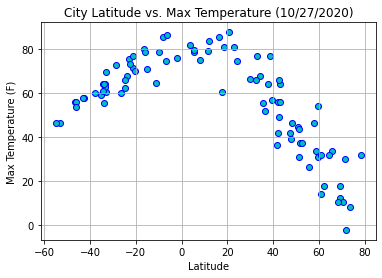

In [317]:
fig, ax = plt.subplots()
ax.set_xlabel(x_label)
ax.set_ylabel(max_temp_label)
ax.set_title(f"City Latitude vs. Max Temperature ({analysis_date})")
ax.grid(True)
ax.scatter(x_values, y_values, marker='o', facecolor='c', edgecolor="b")


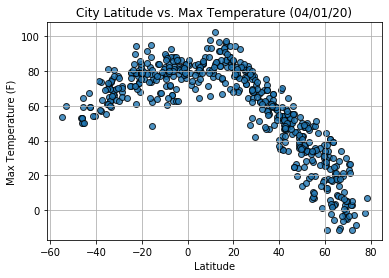

## Latitude vs. Humidity Plot

In [318]:
y_values = clean_city_data["Humidity"]

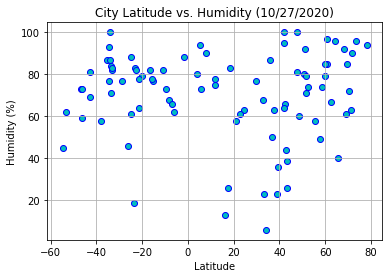

In [320]:
fig, ax = plt.subplots()
ax.set_xlabel(x_label)
ax.set_ylabel(humidity_label)
ax.set_title(f"City Latitude vs. Humidity ({analysis_date})")
ax.grid(True)
ax.scatter(x_values, y_values, marker='o', facecolor='c', edgecolor="b")

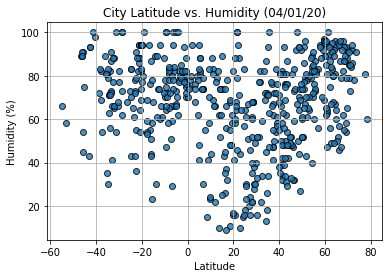

## Latitude vs. Cloudiness Plot

In [321]:
y_values = clean_city_data["Cloudiness"]

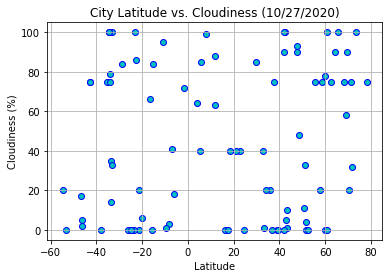

In [323]:
fig, ax = plt.subplots()
ax.set_xlabel(x_label)
ax.set_ylabel(cloud_label)
ax.set_title(f"City Latitude vs. Cloudiness ({analysis_date})")
ax.grid(True)
ax.scatter(x_values, y_values, marker='o', facecolor='c', edgecolor="b")

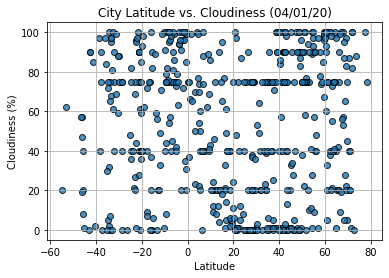

## Latitude vs. Wind Speed Plot

In [325]:
y_values = clean_city_data["Wind Speed"]

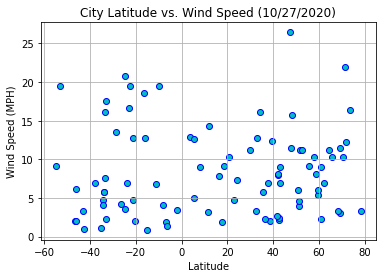

In [326]:
fig, ax = plt.subplots()
ax.set_xlabel(x_label)
ax.set_ylabel(wind_label)
ax.set_title(f"City Latitude vs. Wind Speed ({analysis_date})")
ax.grid(True)
ax.scatter(x_values, y_values, marker='o', facecolor='c', edgecolor="b")

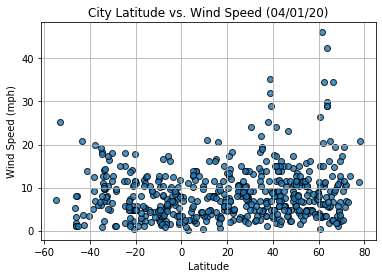

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [345]:
northern_hemisphere = clean_city_data[clean_city_data["Lat"] >= 0]
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

In [346]:
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-value is: -0.8985240081849091


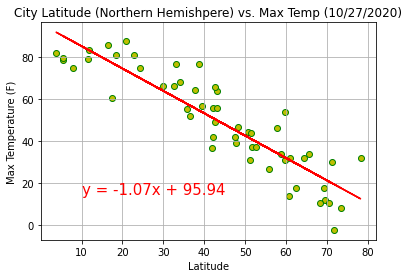

In [347]:
print(f"The r-value is: {rvalue}")
fig, ax = plt.subplots()
ax.set_xlabel(x_label)
ax.set_ylabel(max_temp_label)
ax.set_title(f"City Latitude (Northern Hemishpere) vs. Max Temp ({analysis_date})")
ax.annotate(line_eq,(10,15),fontsize=15,color="red")
ax.grid(True)
ax.scatter(x_values, y_values, marker='o', facecolor='y', edgecolor="g")
ax.plot(x_values, regress_values, "r-")

The r-value is: 0.46937863826630627


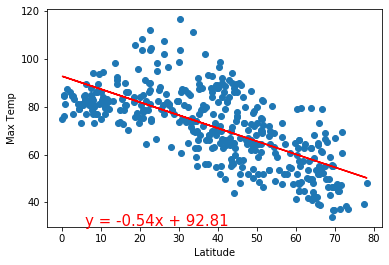

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [348]:
southern_hemisphere = clean_city_data[clean_city_data["Lat"] <= 0]
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

In [349]:
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-value is: 0.8811009012259736


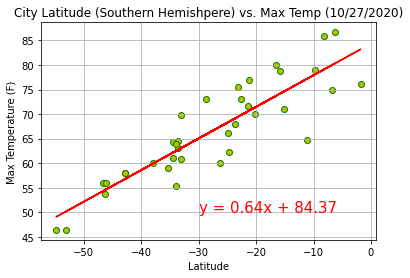

In [353]:
print(f"The r-value is: {rvalue}")
fig, ax = plt.subplots()
ax.set_xlabel(x_label)
ax.set_ylabel(max_temp_label)
ax.set_title(f"City Latitude (Southern Hemishpere) vs. Max Temp ({analysis_date})")
ax.annotate(line_eq,(-30,50),fontsize=15,color="red")
ax.grid(True)
ax.scatter(x_values, y_values, marker='o', facecolor='y', edgecolor="g")
ax.plot(x_values, regress_values, "r-")


The r-value is: 0.6082708688906918


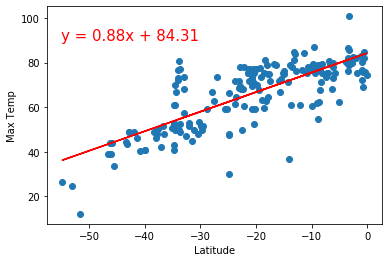

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [354]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

In [355]:
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-value is: 0.22049846728275016


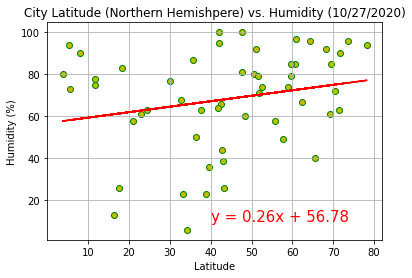

In [358]:
print(f"The r-value is: {rvalue}")
fig, ax = plt.subplots()
ax.set_xlabel(x_label)
ax.set_ylabel(humidity_label)
ax.set_title(f"City Latitude (Northern Hemishpere) vs. Humidity ({analysis_date})")
ax.annotate(line_eq,(40,10),fontsize=15,color="red")
ax.grid(True)
ax.scatter(x_values, y_values, marker='o', facecolor='y', edgecolor="g")
ax.plot(x_values, regress_values, "r-")

The r-value is: 0.000543987878808455


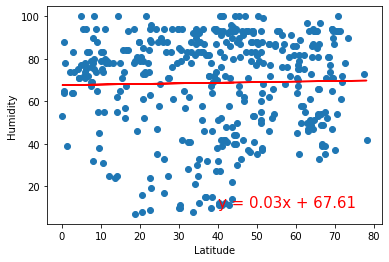

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [359]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

In [360]:
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-value is: 0.11568463067149945


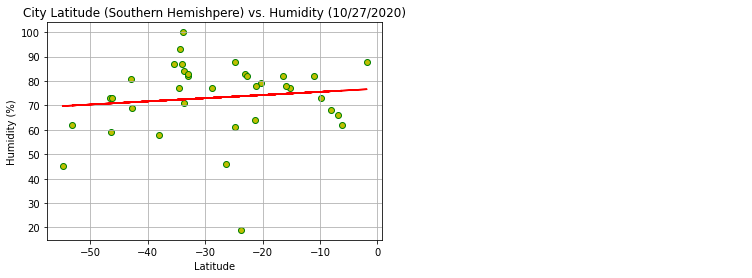

In [361]:
print(f"The r-value is: {rvalue}")
fig, ax = plt.subplots()
ax.set_xlabel(x_label)
ax.set_ylabel(humidity_label)
ax.set_title(f"City Latitude (Southern Hemishpere) vs. Humidity ({analysis_date})")
ax.annotate(line_eq,(40,10),fontsize=15,color="red")
ax.grid(True)
ax.scatter(x_values, y_values, marker='o', facecolor='y', edgecolor="g")
ax.plot(x_values, regress_values, "r-")

The r-value is: 0.014985174297345524


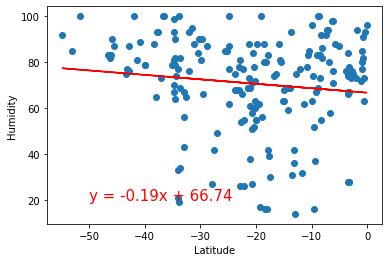

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [370]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]

In [371]:
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-value is: 0.13257829901404658


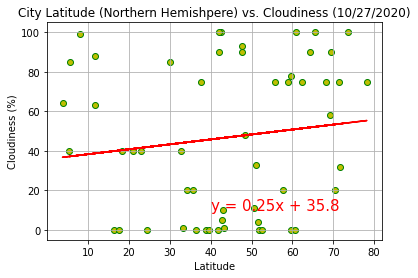

In [372]:
print(f"The r-value is: {rvalue}")
fig, ax = plt.subplots()
ax.set_xlabel(x_label)
ax.set_ylabel(cloud_label)
ax.set_title(f"City Latitude (Northern Hemishpere) vs. Cloudiness ({analysis_date})")
ax.annotate(line_eq,(40,10),fontsize=15,color="red")
ax.grid(True)
ax.scatter(x_values, y_values, marker='o', facecolor='y', edgecolor="g")
ax.plot(x_values, regress_values, "r-")

The r-value is: 0.0020898727664228514


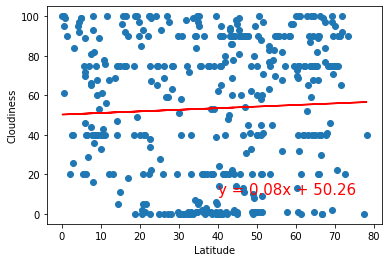

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [373]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

In [374]:
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-value is: 0.036657069811078295


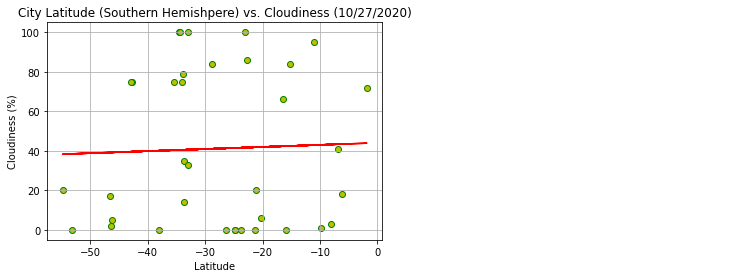

In [375]:
print(f"The r-value is: {rvalue}")
fig, ax = plt.subplots()
ax.set_xlabel(x_label)
ax.set_ylabel(cloud_label)
ax.set_title(f"City Latitude (Southern Hemishpere) vs. Cloudiness ({analysis_date})")
ax.annotate(line_eq,(40,10),fontsize=15,color="red")
ax.grid(True)
ax.scatter(x_values, y_values, marker='o', facecolor='y', edgecolor="g")
ax.plot(x_values, regress_values, "r-")

The r-value is: 0.0035263772085582894


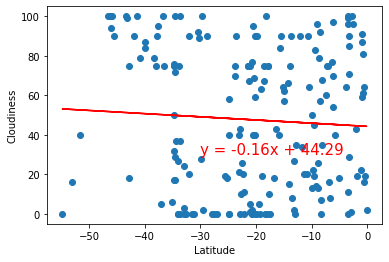

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [378]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

In [379]:
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-value is: 0.07229343665569067


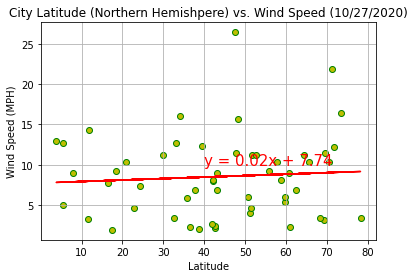

In [380]:
print(f"The r-value is: {rvalue}")
fig, ax = plt.subplots()
ax.set_xlabel(x_label)
ax.set_ylabel(wind_label)
ax.set_title(f"City Latitude (Northern Hemishpere) vs. Wind Speed ({analysis_date})")
ax.annotate(line_eq,(40,10),fontsize=15,color="red")
ax.grid(True)
ax.scatter(x_values, y_values, marker='o', facecolor='y', edgecolor="g")
ax.plot(x_values, regress_values, "r-")

The r-value is: 0.04019723576144484


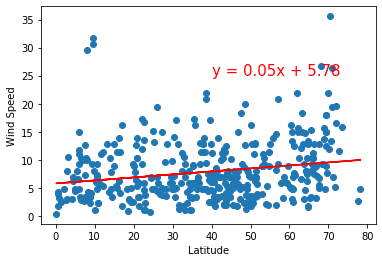

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [381]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

In [382]:
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-value is: 0.021026208451736476


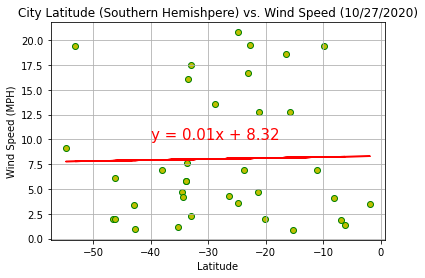

In [384]:
print(f"The r-value is: {rvalue}")
fig, ax = plt.subplots()
ax.set_xlabel(x_label)
ax.set_ylabel(wind_label)
ax.set_title(f"City Latitude (Southern Hemishpere) vs. Wind Speed ({analysis_date})")
ax.annotate(line_eq,(-40,10),fontsize=15,color="red")
ax.grid(True)
ax.scatter(x_values, y_values, marker='o', facecolor='y', edgecolor="g")
ax.plot(x_values, regress_values, "r-")

The r-value is: 0.017128274759839232


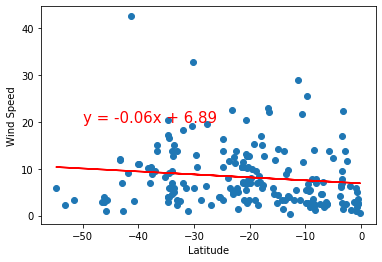